# Live Coding 2

Paso 1: Cargar o generar los datos

In [ ]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(42)
n = 120

publicidad_usd = rng.uniform(500, 10_000, size=n)
visitas_web = rng.uniform(1_000, 20_000, size=n)

# Variable extra: "competencia" (0 = baja, 1 = alta)
competencia = rng.integers(0, 2, size=n)

# Ventas (relación lineal + ruido)
ruido = rng.normal(0, 200, size=n)
ventas = 0.28 * publicidad_usd + 0.07 * visitas_web - 300 * competencia + ruido

df = pd.DataFrame({
    "publicidad_usd": publicidad_usd,
    "visitas_web": visitas_web,
    "competencia": competencia,
    "ventas": ventas
})

print(df.head())
print(df.describe())


   publicidad_usd   visitas_web  competencia       ventas
0     7852.582461  12097.861409            0  2987.139151
1     4669.345178  13347.085430            1  1921.014976
2     8656.680239   2604.442102            0  2555.785938
3     7124.996276   8900.340641            1  2348.535305
4     1394.684805   1790.669303            0   810.156991
       publicidad_usd   visitas_web  competencia       ventas
count      120.000000    120.000000   120.000000   120.000000
mean      5237.769129  10261.641453     0.516667  2044.065393
std       2600.547310   5721.478473     0.501817   871.641350
min        569.941563   1264.789466     0.000000   148.914086
25%       3071.162287   4779.867698     0.000000  1398.664676
50%       4968.097083  10354.629229     1.000000  2111.863381
75%       7415.620493  15318.739864     1.000000  2706.782673
max       9768.412341  19855.135717     1.000000  4069.858813


Paso 2: Ajustar el modelo de regresión lineal múltiple (statsmodels)

In [ ]:
import statsmodels.api as sm

# Variable dependiente
y = df["ventas"]

# Variables independientes
X = df[["publicidad_usd", "visitas_web", "competencia"]]

# Agregamos el intercepto (constante)
X = sm.add_constant(X)


In [ ]:
X.head()



,const,publicidad_usd,visitas_web,competencia
0,1.0,7852.582461,12097.861409,0
1,1.0,4669.345178,13347.085430,1
2,1.0,8656.680239,2604.442102,0
3,1.0,7124.996276,8900.340641,1
4,1.0,1394.684805,1790.669303,0


In [ ]:
y.head()

,ventas
0,2987.139151
1,1921.014976
2,2555.785938
3,2348.535305
4,810.156991


In [ ]:
# Ajustar el modelo OLS
modelo = sm.OLS(y, X).fit()


In [ ]:
# Ver el resumen estadístico
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     729.4
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           4.35e-75
Time:                        16:12:50   Log-Likelihood:                -802.88
No. Observations:                 120   AIC:                             1614.
Df Residuals:                     116   BIC:                             1625.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             89.1221     55.176      1.

## Paso 3: Verificar linealidad

Gráficos de dispersión (scatter plots)

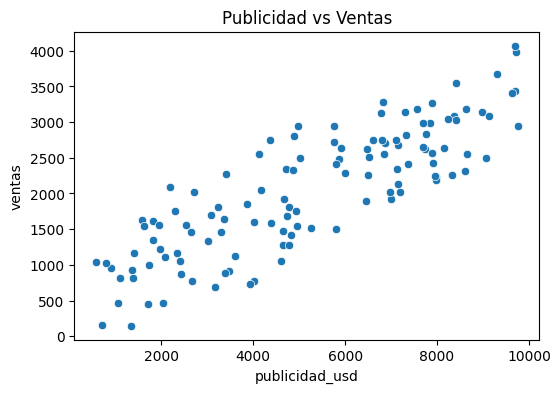

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="publicidad_usd", y="ventas")
plt.title("Publicidad vs Ventas")
plt.show()


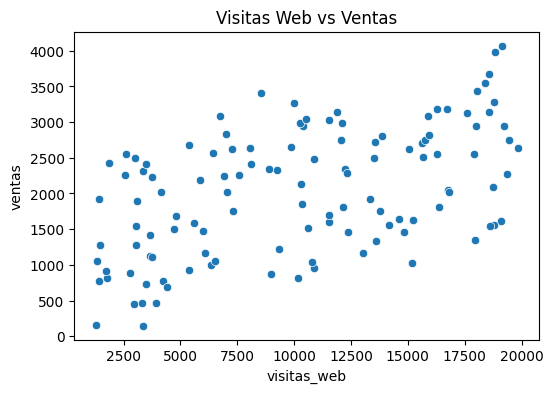

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="visitas_web", y="ventas")
plt.title("Visitas Web vs Ventas")
plt.show()


Competencia vs Ventas

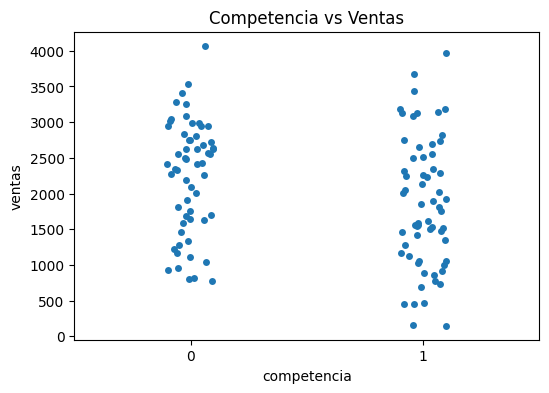

In [ ]:
plt.figure(figsize=(6,4))
sns.stripplot(data=df, x="competencia", y="ventas", jitter=True)
plt.title("Competencia vs Ventas")
plt.show()


Versión más didáctica (con línea ajustada)

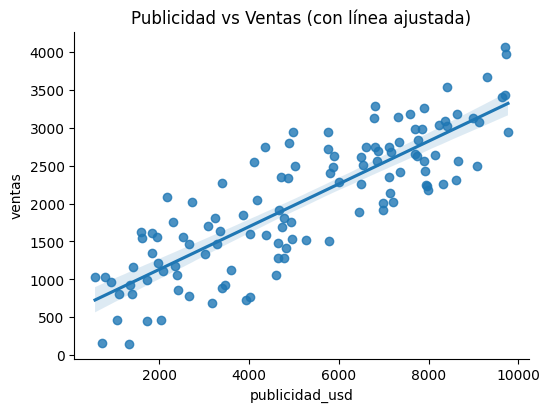

In [ ]:
sns.lmplot(
    data=df,
    x="publicidad_usd",
    y="ventas",
    height=4,
    aspect=1.4
)
plt.title("Publicidad vs Ventas (con línea ajustada)")
plt.show()


## Paso 4: Verifique homocedasticidad graficando residuos vs. valores ajustados.

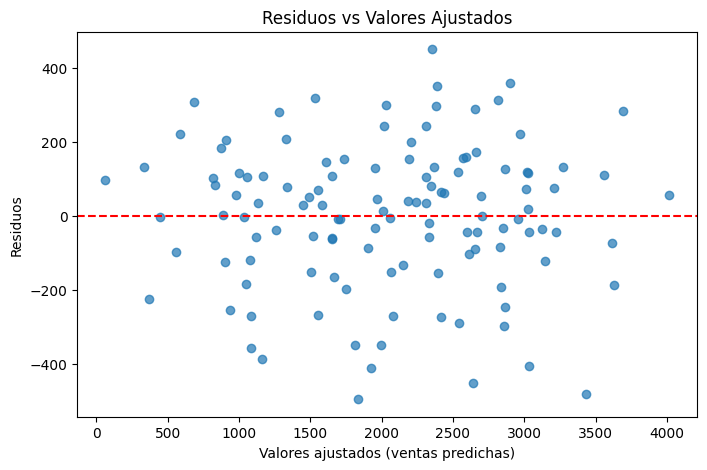

In [ ]:
import matplotlib.pyplot as plt

# Valores ajustados y residuos
valores_ajustados = modelo.fittedvalues
residuos = modelo.resid

plt.figure(figsize=(8, 5))
plt.scatter(valores_ajustados, residuos, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Valores ajustados (ventas predichas)")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Ajustados")

plt.show()


¿Qué estamos mirando exactamente?

* Eje X: valores ajustados → lo que el modelo predice para ventas
* Eje Y: residuos → el error (ventas reales − ventas predichas)
* Línea roja: referencia en 0 (error cero)


“Cuando el modelo predijo X, el error fue Y”.

El gráfico de residuos versus valores ajustados no muestra patrones ni cambios sistemáticos en la dispersión del error.
Por lo tanto, el supuesto de homocedasticidad se cumple razonablemente bien.

## Paso 5: Verifique normalidad del error con QQ-plot y test de Shapiro-Wilk.

¿Los errores del modelo se comportan como una distribución normal?

QQ-Plot de los residuos (visión visual)

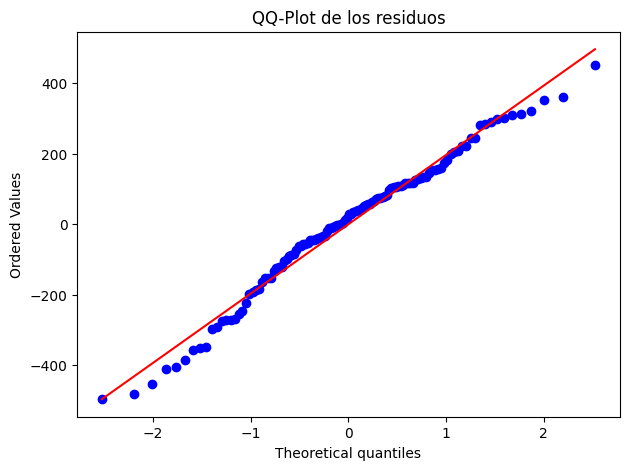

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Residuos del modelo
residuos = modelo.resid

# QQ-Plot
plt.figure(figsize=(7, 5))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot de los residuos")
plt.show()


La línea recta representa cómo deberían verse los residuos si fueran normales

Cada punto es un residuo real del modelo


Si los puntos siguen la línea → normalidad razonable

Si se curvan o se despegan mucho (especialmente en las colas) → posible problema

**Test de Shapiro–Wilk (visión estadística)**

In [ ]:
shapiro_test = stats.shapiro(residuos)

print(
    f"Test de Shapiro-Wilk - "
    f"Estadístico: {shapiro_test[0]:.4f}, "
    f"p-valor: {shapiro_test[1]:.4f}"
)


Test de Shapiro-Wilk - Estadístico: 0.9813, p-valor: 0.0933


¿Qué está haciendo este test?

Hipótesis nula (H₀): los residuos siguen una distribución normal

Hipótesis alternativa: no son normales

El test nos entrega un p-valor.

Regla de decisión

Usar siempre esta misma lógica:

p-valor > 0.05
→ No se rechaza la normalidad
→ La normalidad es razonable

p-valor ≤ 0.05
→ Se rechaza la normalidad
→ Posibles problemas en inferencias

Si juntamos ambas miradas:

✔ Visualmente (QQ-plot): los residuos se ven razonablemente normales

✔ Estadísticamente (Shapiro-Wilk): no se rechaza la hipótesis de normalidad

El supuesto de normalidad del error se considera cumplido para este modelo.

## Paso 6: Calcule VIF para revisar multicolinealidad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Variables independientes
X = df[["publicidad_usd", "visitas_web", "competencia"]]

# Agregar constante (intercepto)
X_const = sm.add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

vif_data


,Variable,VIF
0,const,9.310466
1,publicidad_usd,1.006042
2,visitas_web,1.009165
3,competencia,1.005120


Un VIF tan cercano a 1 quiere decir que cada variable es prácticamente independiente de las otras.

¿Y el VIF alto de const?

* const es el intercepto
* No se interpreta
* Es normal que tenga VIF alto
* No afecta el diagnóstico de multicolinealidad

Conslusión:
* Ninguna variable explicativa está fuertemente correlacionada con otra, por lo que el modelo puede estimar correctamente el efecto de cada predictor.
* Cada variable aporta información distinta al modelo. No hay redundancia ni ruido por correlación entre predictores.

## Paso 7: Discute los resultados con los estudiantes y propone mejoras en caso de supuestos no cumplidos.

El diagnóstico general:

✔ Linealidad: se observa una relación aproximadamente lineal entre los predictores y las ventas.

✔ Homocedasticidad: los residuos están distribuidos de forma pareja alrededor de 0.

✔ Normalidad del error: el QQ-plot y el test de Shapiro-Wilk no muestran evidencia fuerte contra la normalidad.

✔ Multicolinealidad: los VIF están cercanos a 1, no hay variables redundantes.

Conclusión:
El modelo cumple razonablemente bien los supuestos clásicos de regresión lineal múltiple. Por lo tanto, las estimaciones e inferencias son confiables.

Extra:

¿Confiarían en este modelo para tomar decisiones de negocio?

¿Qué variable parece tener más impacto en las ventas?

¿Creen que la realidad siempre cumple tan bien los supuestos como en este ejercicio?